In [1]:
'''THIS NOTEBOOK ALLOWS YOU TO PLOT MAIN DATA FIGURES THAT RELATE TO OUR NEURAL RESULTS'''

from functions import functions_cells_regress as regs
from functions import functions_cells_rsa as rsas
from functions import functions_cells_decode as dec
from functions import functions_cells_svd as SVD
from functions import functions_cells_policy as pol
from functions import plot_neurons as plot_n
from scipy import io
import numpy as np

def import_cell_data(path):
    'Import neural data.'
    HP = io.loadmat(path +'/data_recordings/HP.mat')
    PFC = io.loadmat(path + '/data_recordings/PFC.mat')
    
    'Import neual data after accounting for physical movements.'
    HP_dlc = io.loadmat(path +'/data_recordings/after PCA /HP_dlc_pca.mat')
    PFC_dlc = io.loadmat(path + '/data_recordings/after PCA /PFC_dlc_pca.mat')
    
    return HP, PFC, HP_dlc, PFC_dlc


In [2]:
'''Edit your path to the data folder and import neural data here. 
  HP and PFC will contain raw neural data.
  HP_dlc and PFC_dlc will contain neural data after accounting for fine physical movements using DeepLabCut data.'''

your_path_to_data = '/Users/veronikasamborska/Desktop/data_share/'
HP, PFC, HP_dlc, PFC_dlc =  import_cell_data(your_path_to_data)

'''perms parameter determines the number of permutations to sessions to run (used in most of the Main Figures below);
   paper used n_perms = 5000 but such high numbers will take a long time to run.'''
perms = 100


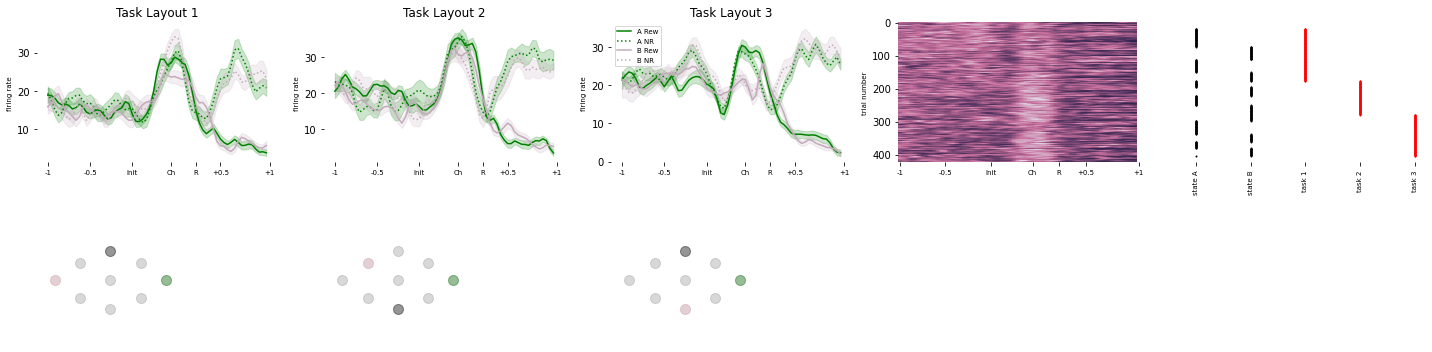

In [3]:
''' Fig 2 | To plot the firing rate for any neuron from any session changing the indexing variables below. '''
plot_n.plot_neuron(PFC, session_id = 0, neuron_ID = 0)


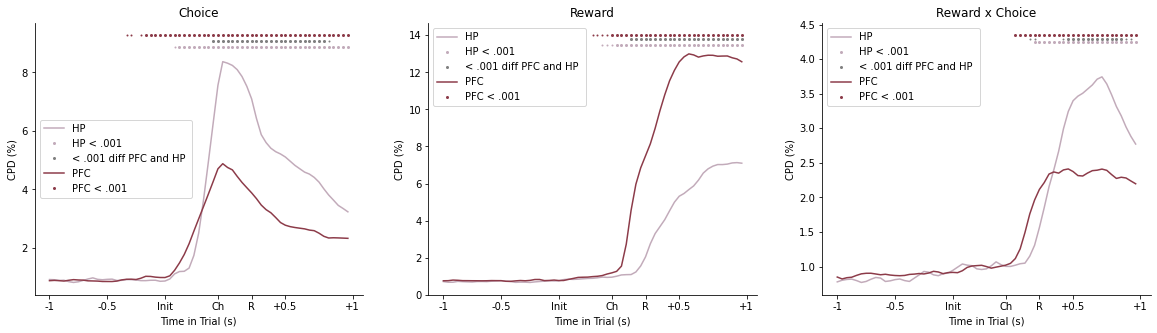

In [4]:
'''Fig 4B | CPDs from linear regression for choice, outcome and outcome × choice regressors in PFC and CA1.
   Significance levels for within-region effects were based on a two-sided permutation test where firing rates
   were rolled with respect to trials. Significance levels for differences between regions were based on a two-sided permutation test
   across sessions. All significance levels were corrected for multiple comparison over timepoints.''' 
regs.plot_simple_GLM(HP,PFC, n_perm = perms, animal_perm = False)


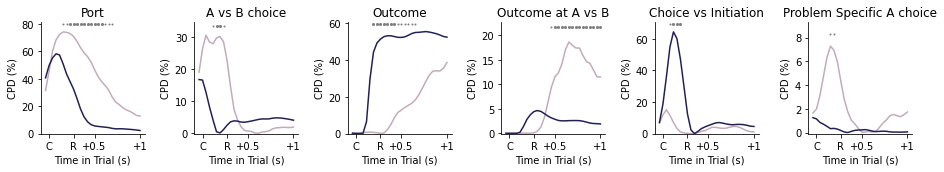

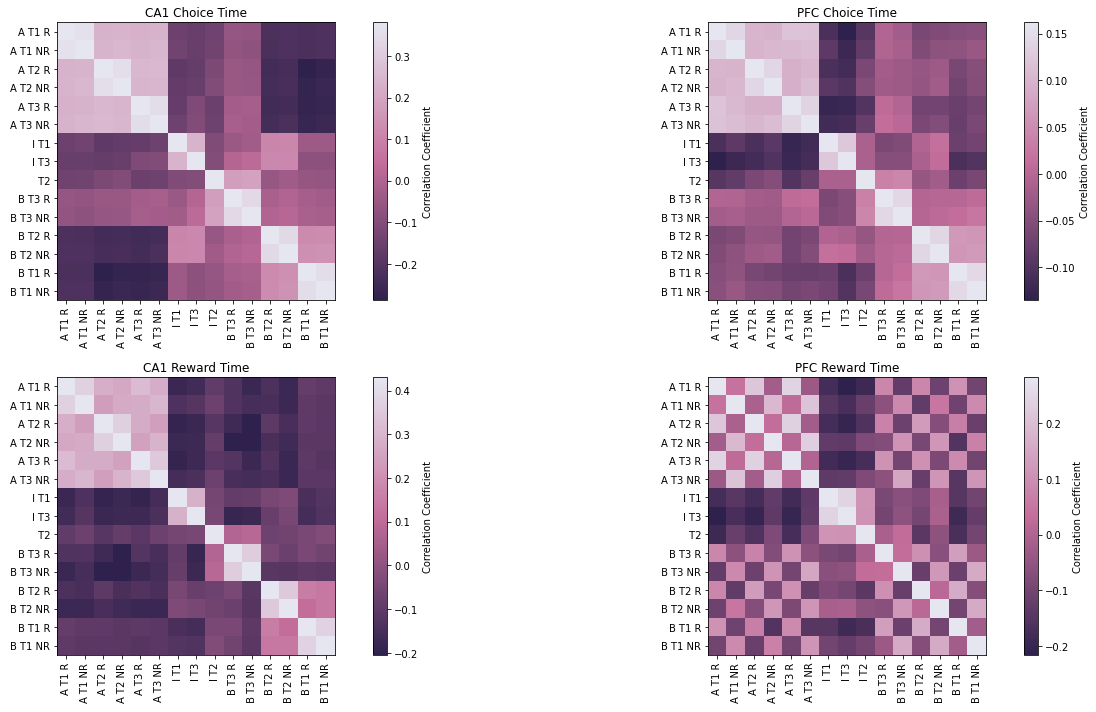

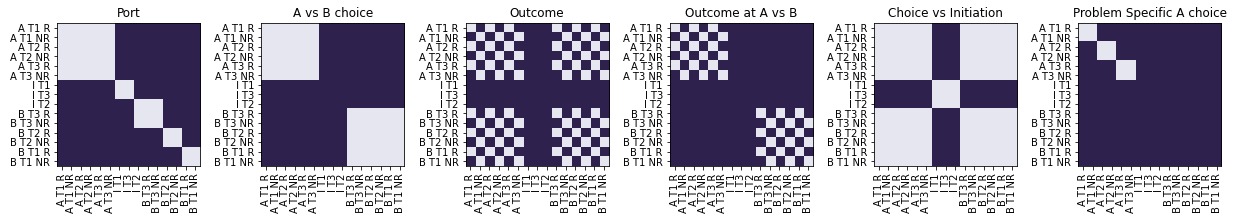

In [5]:
'''Fig 4E | CPDs in a regression analysis modeling the pattern of representation similarities using the RDMs shown in 4D.
   The time course is given by sliding the windows associated with choices from being centred on choice port entry to 0.76 seconds after choice port entry while holding
   time windows centred on trial initiations fixed.
   
   Fig 4C | Representation similarity at ‘choice time’ (left) and ‘outcome time’ (right), quantified as the Pearson correlation between the demeaned neural activity vectors for each pair of conditions. 
   
   Fig 4D |  RDMs used to model the patterns of representation similarity observed in the data. Each RDM codes the expected pattern of similarities among categories in c under
   the assumption that the population represents a given variable.'''
rsas.RSA_across_time_plot(HP, PFC, perm_n = perms, dlc = False)


Correct decoding NS
Position in Trial Sequence decoding p < 0.05
Port decoding p < 0.05


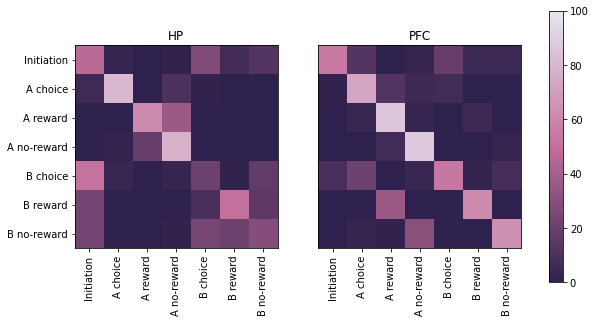

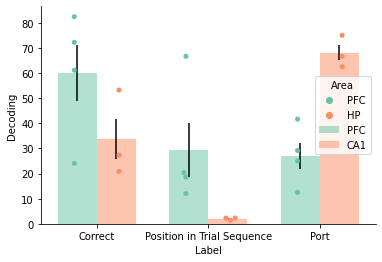

In [6]:
'''Fig 4F | Confusion matrices from linear decoding of position in trial, using a decoder that was trained on one problem and tested on another, averaged
   across animals and across all problem pairs. Colored squares indicate three possible patterns of decoding that indicate different neuronal content. Blue
   indicates correct cross-task decoding to the same abstract state (for example, B choice decodes to B choice). Red indicates decoding to a different state
   that could have occurred at the same sequential position in the trial (for example, B choice decodes to A choice). Dashed green corresponds to decoding to
   the same physical port for those training and test layouts where the Initiation and B choice ports interchanged (for example, B choice decodes to Initiation
   when the decoder was trained on layout 2 and tested on layout 3).

   Fig 4G | Bar plots showing the probability of the cross-task decoder outputting the correct
   abstract state, the other state that can have the same position in the trial sequence and the state that has the same physical port as the
   training data (computed only from confusion matrices where B choice and initiation ports interchange) computed using the corresponding
   cells highlighted in 4F'''
dec.plot(HP, PFC)


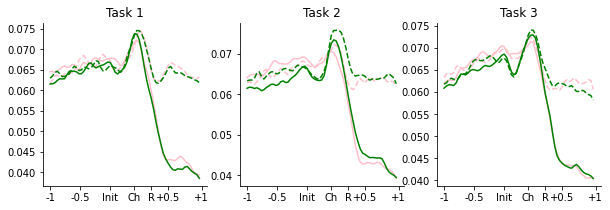

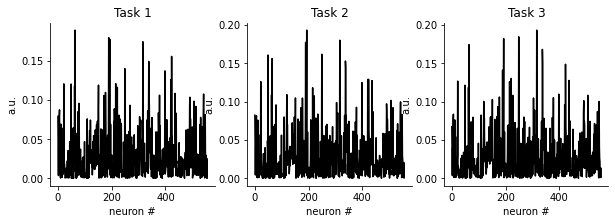

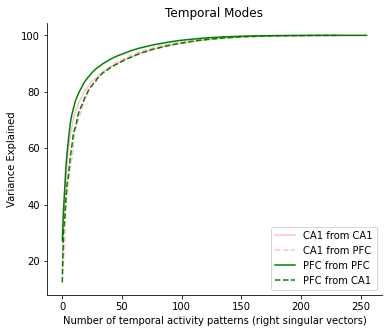

In [7]:
'''Fig 4B - first temporal mode from the SVD decomposition of data matrix from PFC plotted in each problem separately for clarity and separated by A (green) and B (pink) rewarded (solid) and
   non-rewarded (dashed) choices. 
    
   Fig 4C - first cellular mode from SVD decomposition of data matrix from PFC in each problem showing that similar patterns of
   cells participate in all problems. 

   Fig 4E Variance explained when using temporal activity patterns to predict either activity from the same problem and brain region (solid lines) or a different brain region (and, therefore, different animal) and the same problem (dashed lines) D2. f, Variance explained
   when using cellular activity patterns U1 from one problem to predict either held-out activity from the same problem (solid lines) or activity from a different
   problem (dashed lines).'''
SVD.plot_example_patterns(PFC)
SVD.svd_between_brains(HP_dlc,PFC_dlc, inds = np.arange(64))


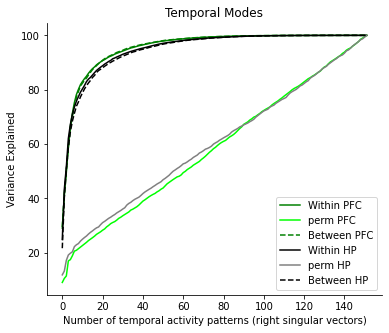

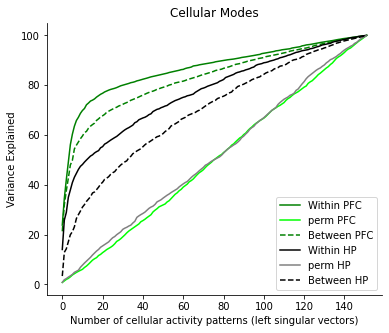

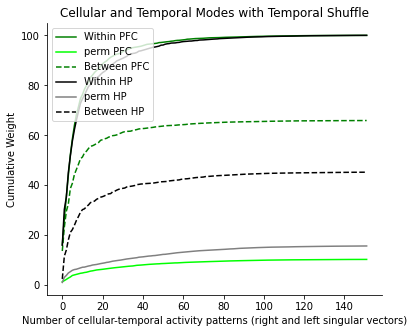

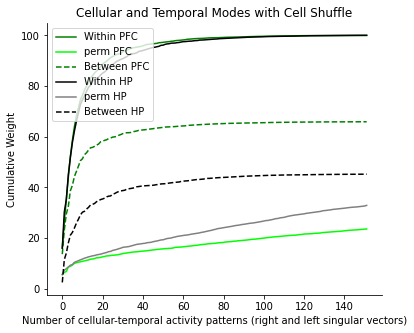

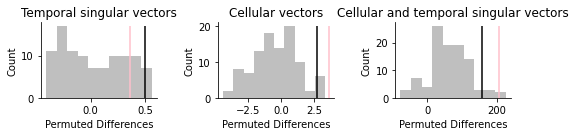

In [8]:
 '''Fig 4D - variance explained when using temporal activity patterns from one problem to predict either held-out activity from
    the same problem (solid lines) or activity from a different problem (dashed lines).
    
    Fig 4D - variance explained when using cellular activity patterns from one problem to predict either held-out activity from
    the same problem (solid lines) or activity from a different problem (dashed lines).
    
    Fig 4G - cumulative weights along the diagonal Σ using pairs of temporal V1 and cellular U1 activity patterns from one problem to predict either 
    held-out activity from the same problem (solid lines) or activity from a different problem (dashed lines). Weights were normalized by peak cross-validated cumulative weight computed
    on the activity from the same problem. 
    
    Fig 4H- G - areas between the dashed and solid lines in D,F and G.'''
SVD.plot_main_figure(HP, PFC, HP_dlc, PFC_dlc, n_perms = perms)


Trial 1 t-stat 18.505 p-stat 0.0
Trial 2 t-stat 8.444 p-stat 0.0
Trial 3 t-stat 4.194 p-stat 0.006
Trial 4 t-stat 4.99 p-stat 0.002
Trial 5 t-stat 4.82 p-stat 0.003
Trial 6 t-stat 5.1 p-stat 0.002
Trial 7 t-stat 1.99 p-stat 0.094
Trial 8 t-stat 4.463 p-stat 0.004
Trial 9 t-stat 4.046 p-stat 0.007
Trial 10 t-stat 4.125 p-stat 0.006
Trial 11 t-stat 2.276 p-stat 0.063
Trial 12 t-stat -0.535 p-stat 0.612


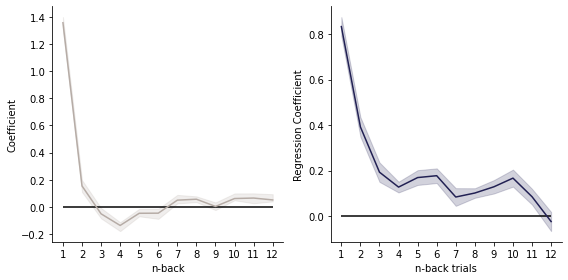

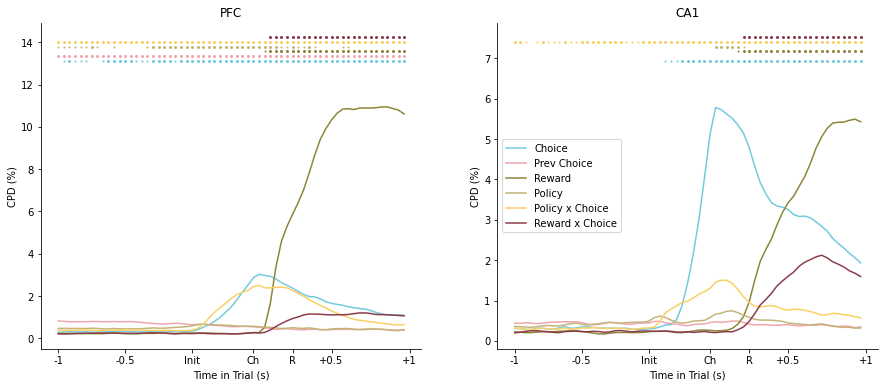

In [9]:
'''Fig 6A - weights from logistic regression predicting choices in recording sessions using choices, rewards and choice
   × reward interactions over the previous 12 trials as predictors.''' 
pol.plot_policy_during_recordings(PFC,HP, n = 12)

'''Fig 6B - CPDs from regression models predicting neural activity using current trial events, subjects’ policy (estimated using the behavioral regression in a) and policy interacted with current
   choice. Stars denote the timepoints at which each regressor explained significantly more variance than expected by chance (permutation test based on
   rolling firing rates with respect to trials, P < 0.001, corrected for multiple comparisons; for more details on permutation tests, see the ‘Statistical significance’
   section).'''
pol.plot_policy_simple_GLM(HP,PFC, n_perm = perms, n = 11, dlc = False)


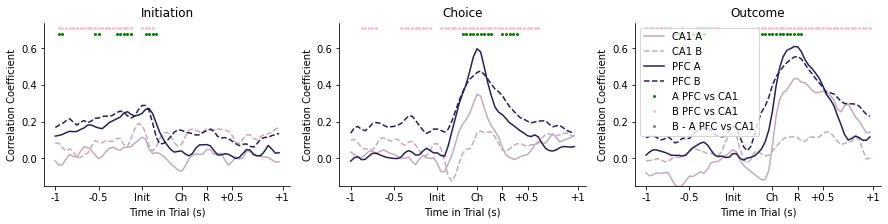

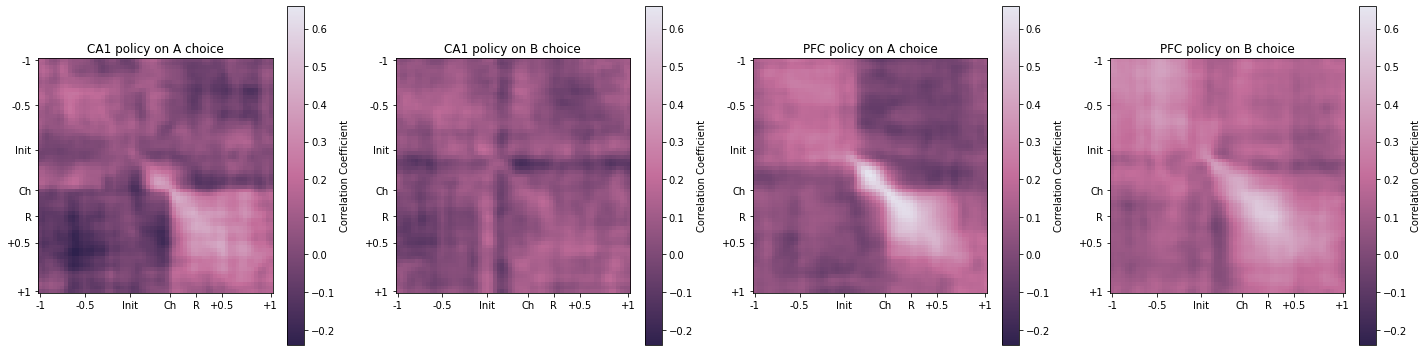

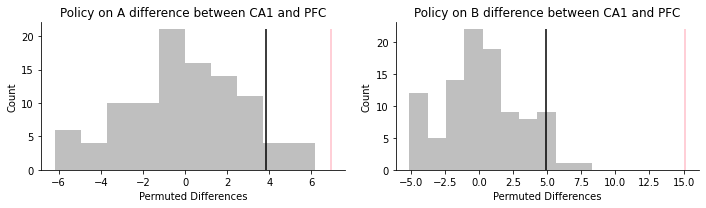

In [3]:
'''Fig 6C -  correlations across problems between policy weights in regressions predicting neural activity. Regressions were run separately for A (left panels)
   and B (right panels) choices in each problem and at each timepoint across the trial. Correlations of policy representations between all problem pairs were
   evaluated for each pair of timepoints; values on the diagonal show how correlated policy representation was at the same timepoint in both problems. Positive
   correlation indicates that the same neurons coded policy with the same sign in both problems.'''
pol.plot_correlations_slice(PFC, HP, n = 11, c_1 = 1, perm_n = perms, dlc = False, animal_perm = False)

'''Fig 6D - To quantify whether policy generalized more strongly between problems in PFC than CA1, we computed the between-region difference in the sum along the diagonal of the correlation matrices in c, separately
    for A and B choices, and compared it against the null distribution obtained by permuting sessions between brain regions. Policy representation on both A
    and B choices generalized more strongly in PFC than CA1. e, Slices through the correlation matrices at initiation (left), choice (center) and outcome (right)
    times for A (solid) and B (dashed line) choices. Significant differences between conditions are indicated by stars as shown in the legend.'''
pol.plot_diagonal_sums(HP, PFC, perm_n = perms, dlc = False)
